In [1]:
 # imports
from panel.interact import interact
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from panel import widgets
import os
import numpy as np
from pathlib import Path
from dotenv import load_dotenv

In [2]:
pn.extension()

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("files/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

In [5]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
to_data_gb = to_data.groupby("year").sum().drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
to_data_gb

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [6]:
# Save the dataframe as a csv file
to_data_gb.to_csv(r'C:\Users\rodig\Downloads\Unit-6---Pythonic-Monopoly\dwelling_types_units_per_year.csv', index = False)

In [7]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    to_data_type = data.hvplot.bar(
    title=(title),
    xlabel=(xlabel), 
    ylabel=(ylabel),
    color=(color),
    rot=90,
    width=600, height=500).opts(
    yformatter="%.0f")
    return to_data_type

In [8]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart_01 = create_bar_chart(
    data = to_data_gb.iloc[0],
    title="Dwelling Types Units in Toronto in 2001",
    xlabel="2001", 
    ylabel="Dwelling Types Units",
    color="Red",
    )

# Bar chart for 2006
create_bar_chart_06 = create_bar_chart(
    data = to_data_gb.iloc[1],
    title="Dwelling Types Units in Toronto in 2006",
    xlabel="2006", 
    ylabel="Dwelling Types Units",
    color="Blue",
    )

# Bar chart for 2011
create_bar_chart_11 = create_bar_chart(
    data = to_data_gb.iloc[2],
    title="Dwelling Types Units in Toronto in 2011",
    xlabel="2011", 
    ylabel="Dwelling Types Units",
    color="Yellow",
    )


# Bar chart for 2016
create_bar_chart_16 = create_bar_chart(
    data = to_data_gb.iloc[3],
    title="Dwelling Types Units in Toronto in 2016",
    xlabel="2016", 
    ylabel="Dwelling Types Units",
    color="magenta",
    )

create_bar_chart_01 + create_bar_chart_06 + create_bar_chart_11 + create_bar_chart_16

:Layout
   .Bars.A_2001 :Bars   [index]   (2001)
   .Bars.A_2006 :Bars   [index]   (2006)
   .Bars.A_2011 :Bars   [index]   (2011)
   .Bars.A_2016 :Bars   [index]   (2016)

In [9]:
# Calculate the average monthly shelter costs for owned and rented dwellings
to_data_shelter_costs = (to_data[["shelter_costs_owned", "shelter_costs_rented"]]).groupby("year").mean().sort_values("year")
to_data_shelter_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [10]:
# Helper create_line_chart function
def create_line_chart_shelter(data, title, xlabel, ylabel, color):
    to_data_shelter = data.hvplot.line(
    title=(title),
    xlabel=(xlabel), 
    ylabel=(ylabel),
    color=(color),
    width=550, 
    height=350
    )
    return to_data_shelter

In [11]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_shelter_owned = create_line_chart_shelter(
    data = to_data_shelter_costs.iloc[:,0],
    title="Average Monthly Shelter Cost for Owned Dwellings in Toronto",
    xlabel="Year", 
    ylabel="Avg Monthly Shelter Costs",
    color="Blue",
    )

# Line chart for rented dwellings
create_line_shelter_rented = create_line_chart_shelter(
    data = to_data_shelter_costs.iloc[:,1],
    title="Average Monthly Shelter Cost for Rented Dwellings in Toronto",
    xlabel="Year", 
    ylabel="Avg Monthly Shelter Costs",
    color="Yellow",
    )

create_line_shelter_owned + create_line_shelter_rented

:Layout
   .Curve.Shelter_costs_owned  :Curve   [year]   (shelter_costs_owned)
   .Curve.Shelter_costs_rented :Curve   [year]   (shelter_costs_rented)

In [12]:
# Calculate the average house value per year
average_house_value = (to_data[["average_house_value"]]).groupby("year").mean().sort_values("year")
average_house_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

In [13]:
# Plot the average house value per year as a line chart
average_house_value.hvplot.line(
    x="year",
    y="average_house_value",
    xlabel="Year", 
    ylabel="Avg House Value",
    title="Average House Value in Toronto",
    width=480, 
    height=350,
).opts(line_color='blue', yformatter="%.0f")

:Curve   [year]   (average_house_value)

In [14]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_per_neighb = (to_data[["neighbourhood", "average_house_value"]]).sort_values(["year","neighbourhood"]).reset_index()
avg_per_neighb.head(10)

year                 neighbourhood  average_house_value
0  2001               Agincourt North               200388
1  2001  Agincourt South-Malvern West               203047
2  2001                     Alderwood               259998
3  2001                         Annex               453850
4  2001             Banbury-Don Mills               371864
5  2001                Bathurst Manor               304749
6  2001           Bay Street Corridor               257404
7  2001               Bayview Village               327644
8  2001         Bayview Woods-Steeles               343535
9  2001          Bedford Park-Nortown               565304

In [15]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
def choose_neighbourhood(neighbourhood):
    return neighbourhood
list_of_neighbourhood = avg_per_neighb["neighbourhood"].values.tolist()

In [16]:
def interact_neighbourhood():
    interact(choose_neighbourhood, neighbourhood=list_of_neighbourhood)
    return interact

In [17]:
avg_per_neighb.hvplot.line(
    x="year",
    y="average_house_value",
    xlabel="Year", 
    ylabel="Avg House Value",
    title="Neighbourhood:",
    groupby='neighbourhood',
    width=480, 
    height=350).opts(line_color='blue', yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [18]:
# Fetch the data of all dwelling types per year
to_data_all = to_data.reset_index()
to_data_all = to_data_all[["year", "neighbourhood", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]].set_index("year")
to_data_all.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0

In [19]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
to_data_all.hvplot.bar(
    xlabel="Year", 
    ylabel="Dwelling Types Units",
    title="Neighbourhood:",
    groupby='neighbourhood',
    rot=90,
    width=600, 
    height=450,
).opts(line_color='blue', yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [20]:
# Getting the data from the top 10 expensive neighbourhoods
to_data_mean = to_data.reset_index().copy().drop(columns=["year"]).set_index("neighbourhood").groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False)
to_data_mean.head(10)

single_detached_house  \
neighbourhood                                              
Bridle Path-Sunnybrook-York Mills                2260.00   
Forest Hill South                                1742.50   
Lawrence Park South                              3472.50   
Rosedale-Moore Park                              2498.75   
St.Andrew-Windfields                             3225.00   
Casa Loma                                         916.25   
Bedford Park-Nortown                             4865.00   
Forest Hill North                                1488.75   
Kingsway South                                   2326.25   
Yonge-St.Clair                                    565.00   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Bridle Path-Sunnybrook-York Mills                       331.25   
Forest Hill South                                      2031.25   
Lawrence Park South                                     773.75   
Rosedale-Moore Park                                    4641.25   
St.Andrew-Windfields                                   1670.00   
Casa Loma                                              2310.00   
Bedford Park-Nortown                                   1981.25   
Forest Hill North                                      3392.50   
Kingsway South                                          576.25   
Yonge-St.Clair                                         3948.75   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Bridle Path-Sunnybrook-York Mills              0.00                36.25   
Forest Hill South                              1.25                61.25   
Lawrence Park South                            0.00               126.25   
Rosedale-Moore Park                            0.00               486.25   
St.Andrew-Windfields                           0.00               185.00   
Casa Loma                                      0.00               288.75   
Bedford Park-Nortown                           0.00                43.75   
Forest Hill North                              0.00                12.50   
Kingsway South                                 0.00                66.25   
Yonge-St.Clair                                 0.00               425.00   

                                   row_house  duplex  \
neighbourhood                                          
Bridle Path-Sunnybrook-York Mills      90.00    25.0   
Forest Hill South                      45.00    75.0   
Lawrence Park South                    38.75   225.0   
Rosedale-Moore Park                   245.00   327.5   
St.Andrew-Windfields                  552.50    97.5   
Casa Loma                             201.25   162.5   
Bedford Park-Nortown                   57.50   287.5   
Forest Hill North                      16.25    82.5   
Kingsway South                         48.75    20.0   
Yonge-St.Clair                        212.50   172.5   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Bridle Path-Sunnybrook-York Mills                        40.00         0.00   
Forest Hill South                                      1027.50         3.75   
Lawrence Park South                                     966.25        16.25   
Rosedale-Moore Park                                    1618.75         2.50   
St.Andrew-Windfields                                    586.25         5.00   
Casa Loma                                              1192.50         2.50   
Bedford Park-Nortown                                   1275.00        88.75   
Forest Hill North                                       402.50         1.25   
Kingsway South                                          336.25         2.50   
Yonge-St.Clair                                         1308.75    

In [21]:
# Plotting the data from the top 10 expensive neighbourhoods
to_data_exp_top10 = to_data_mean.iloc[0:10, :].hvplot.bar(
    x='neighbourhood', 
    y='average_house_value',
    xlabel="Neighbourhood", 
    ylabel="Avg House Value",
    title="Top 10 Expensive Neighbourhood in Toronto",
    rot=90,
    width=600, 
    height=500).opts(
    yformatter="%.0f"
    )
to_data_exp_top10

:Bars   [neighbourhood]   (average_house_value)

In [22]:
# Load neighbourhoods coordinates data
file_path = Path("files/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path).set_index("neighbourhood").sort_values("neighbourhood")
df_neighbourhood_locations.head()

lat        lon
neighbourhood                                     
Agincourt North               43.805441 -79.266712
Agincourt South-Malvern West  43.788658 -79.265612
Alderwood                     43.604937 -79.541611
Annex                         43.671585 -79.404001
Banbury-Don Mills             43.737657 -79.349718

In [23]:
# Calculate the mean values for each neighborhood
to_data_mean_neighb = to_data_mean.sort_values("neighbourhood")
to_data_mean_neighb.head()

single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                          329811.5              1109.00   
Agincourt South-Malvern West             334189.0              1131.25   
Alderwood                                427922.5              1166.75   
Annex                                    746977.0              1692.75   
Banbury-Don Mills                        612039.0              1463.50   

                              shelter_costs_rented  
neighbourhood                                       
Agincourt North                             983.50  
Agincourt South-Malvern West                985.00  
Alderwood                                  1003.25  
Annex                                      1315.25  
Banbury-Don Mills                          1242.75

In [33]:
# Join the average values with the neighbourhood locations
df_locations_mean = pd.concat([df_neighbourhood_locations, to_data_mean_neighb], axis="columns", join="inner").reset_index()
df_locations_mean.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

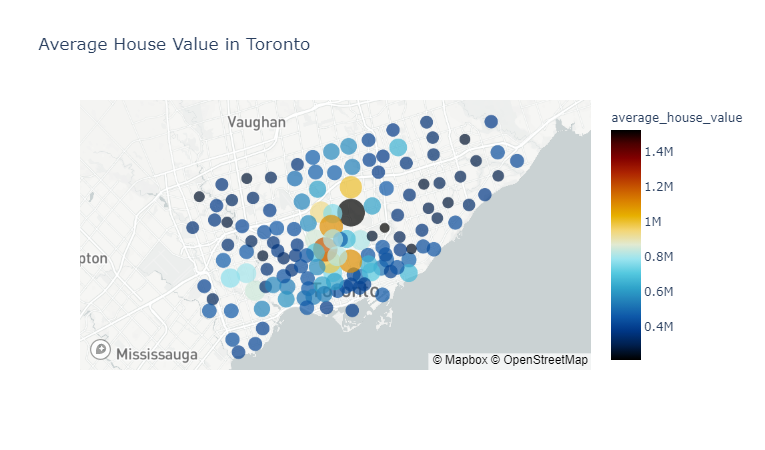

In [120]:
# Create a scatter mapbox to analyze neighbourhood info
map_info = px.scatter_mapbox(
    df_locations_mean,
    lat="lat",
    lon="lon",
    hover_data=df_locations_mean,
    hover_name="neighbourhood",
    size="average_house_value",
    color="average_house_value",
    color_continuous_scale="icefire",
    title="Average House Value in Toronto",
    zoom=9,
    width=850, 
    height=450
)
map_info.show()

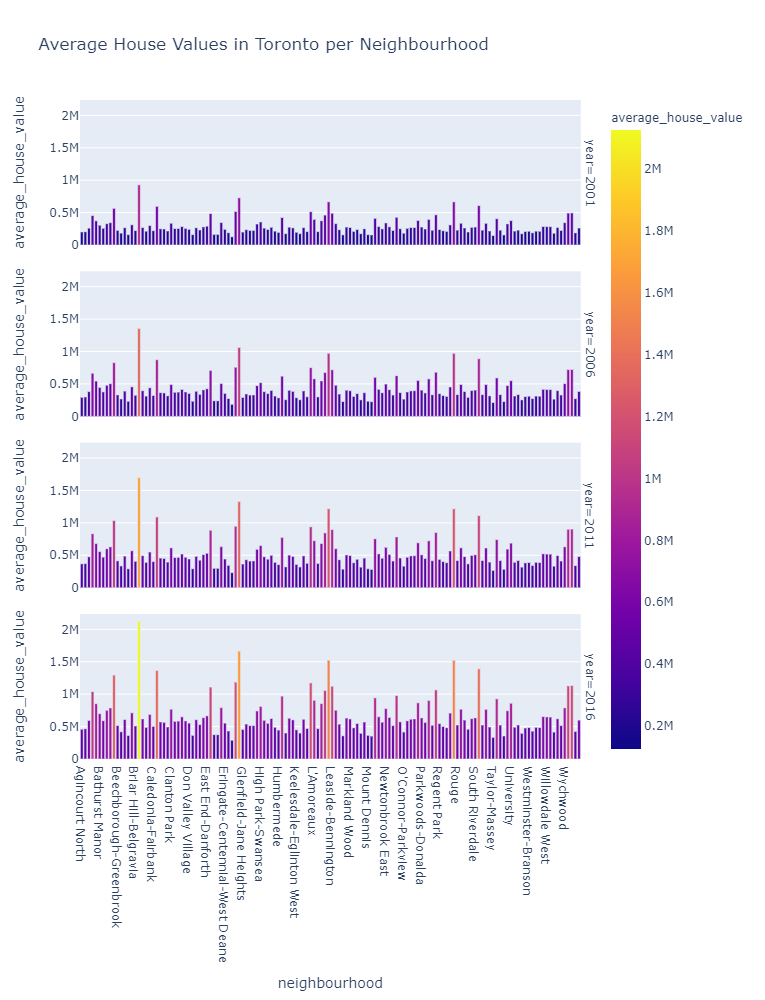

In [58]:
#Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year
to_data_year = to_data.reset_index().copy()
fig = px.bar(
    to_data_year, 
    x="neighbourhood", 
    y="average_house_value", 
    color="average_house_value", 
    facet_row="year",
    facet_row_spacing=0.04,
    facet_col_spacing=0.04,
    height=1000, width=900,
    title="Average House Values in Toronto per Neighbourhood")
fig.show()

In [133]:
# Fetch the data from all expensive neighbourhoods per year.
to_data_expensive = to_data.loc[to_data["average_house_value"] >= 500000, :].reset_index()
to_data_expensive.tail(20)

year                      neighbourhood  single_detached_house  \
174  2016                             Rustic                   1150   
175  2016                     South Parkdale                    200   
176  2016                    South Riverdale                    865   
177  2016               St.Andrew-Windfields                   3245   
178  2016                            Steeles                   3725   
179  2016                Stonegate-Queensway                   5790   
180  2016                        The Beaches                   2590   
181  2016       Thistletown-Beaumond Heights                   1575   
182  2016                  Trinity-Bellwoods                    385   
183  2016                         University                    125   
184  2016  Waterfront Communities-The Island                    255   
185  2016                    Willowdale East                   3385   
186  2016                    Willowdale West                   2030   
187  2016   Willowridge-Martingrove-Richview                   3600   
188  2016                  Woodbine Corridor                    885   
189  2016                   Woodbine-Lumsden                   1885   
190  2016                           Wychwood                    920   
191  2016                     Yonge-Eglinton                   1400   
192  2016                     Yonge-St.Clair                    520   
193  2016                 Yorkdale-Glen Park                   2165   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
174                         1965                 0                  210   
175                         7170                 5                  150   
176                         2175                 0                 2390   
177                         1745                 0                  175   
178                         2715                 5                  185   
179                         1035                 0                  100   
180                          640                 0                 1450   
181                          680                 0                  300   
182                          295                 0                  715   
183                         1125                 0                  215   
184                        39265                 0                   40   
185                        16100                 0                   65   
186                         4630                 0                  140   
187                         3740                 0                  530   
188                          690                 0                 1555   
189                          610                 0                  325   
190                         1295                 0                  880   
191                         1995                 0                  465   
192                         4315                 0                  450   
193                         1185                 0                   80   

     row_house  duplex  apartment_five_storeys_less  other_house  \
174          5      85                          240            0   
175        355     210                         3280            5   
176       1660     685                         4195           85   
177        540     120                          595            5   
178        555     355                          285            0   
179        440     245                         2765            5   
180        340     465                         3925           15   
181         50     375                          295            5   
182        890     875                         3385          365   
183        285     185                         1410           50   
184        560      80                          535           20   
185        845     250                         1650           20   
186        250     300                          195  

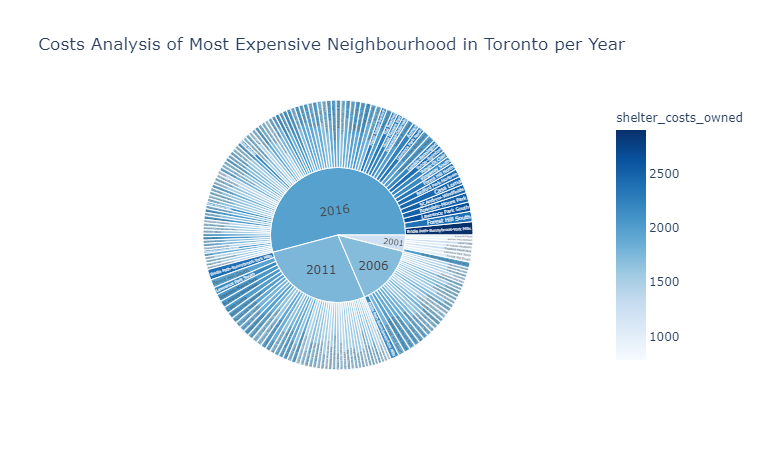

In [132]:
 # Create the sunburst chart
fig_1 = px.sunburst(to_data_expensive, path=['year', "neighbourhood"], values='average_house_value',
                  color='shelter_costs_owned', hover_data=['average_house_value'],
                  color_continuous_scale='Blues', title="Costs Analysis of Most Expensive Neighbourhood in Toronto per Year",
                  color_continuous_midpoint=np.average(to_data_expensive['shelter_costs_owned'], 
                                                       weights=to_data_expensive['average_house_value']))
fig_1.show()